# Fabio Grassiotto - RA 890441 - IA901A
# Ex02 - Histograma e Extração de Características

Esta atividade tem 2 objetivos principais: 
  - entender o conceito de histograma e estatísticas da imagem
  - explorar diferentes formas de extração de características em histogramas e sua aplicação em um problema de classificação. 

## Parte 1 - Histograma

Leia o notebook [Histograma de imagens](https://github.com/lrittner/Computacao-Visual/blob/master/tutoriais/05_Histograma_da_imagem.ipynb) para entender o conceito de histograma e o uso da função *np.histogram*. Tente também entender a função a seguir, que plota o histograma usando gráfico de barras. Essa função será muito útil nos exercícios deste notebook. 

In [1]:
def plota_hist(h,cor,nbins,bin_edges, axs):

    w=255./nbins
    bin_centers = bin_edges[1:]-(w/2)
    axs.bar(bin_centers, h, width=w, color=cor) # Pequena modificação para plotagem em subplots.
    #plt.title('Historama da imagem: %s bins' % (nbins))

### Exercício 2.1.1

Vamos tentar calcular o histograma de imagens coloridas. Use as 2 imagens da pasta **IA901A_Ex02/1** e plote os histogramas de cada uma das bandas usando gráficos de barras. Compare visualmente os histogramas e comente as principais diferenças. Se você tivesse que dizer quais histogramas pertencem a qual das 2 imagens, você seria capaz de acertar? Explique porque?


In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
import os
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


unicamp_dia.jpg
unicamp_noite.jpg


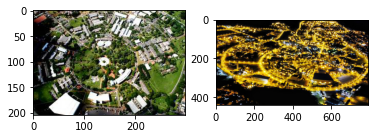

In [3]:

list_files = os.listdir("gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1")
for i, file in enumerate(list_files):
  print(file)
  plt.subplot(121+i)
  img = mpimg.imread(path+file)
  
  plt.imshow(img)


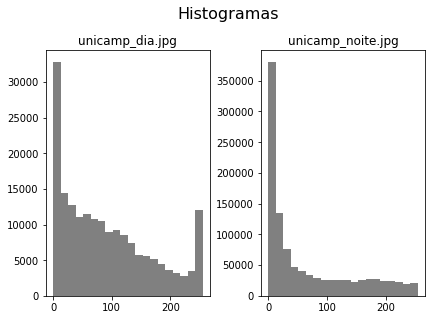

In [4]:
# Seu código aqui
list_files = os.listdir("gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1")

fig, ax = plt.subplots(1, len(list_files))
fig.tight_layout(w_pad=2)
fig.suptitle('Histogramas', fontsize=16, y=1.10)

for i, file in enumerate(list_files):

  img = mpimg.imread(path+file)
  
  nbins = 20
  h, bin_edges = np.histogram(img, nbins,(0,255))
  
  ax[i].set_title(str(file))
  plota_hist(h, 'gray', nbins, bin_edges, ax[i])

#### Análise das imagens

Dados os gráficos dos histogramas gerados, acredito que eu não conseguiria acertar quais fotos estão relacionadas a cada um dos histogramas. A diferença das intensidades intermediárias não é suficiente para a separação das duas imagens.

Acredito que a razão para tanto é o fato de ambas as imagens serem coloridas, por não termos efetuado ainda a conversão para tons de cinza.

### Exercício 2.1.2

Usando as mesmas imagens coloridas do item anterior, faça a conversão para níveis de cinza, usando um dos métodos abaixo:
   - médias das bandas R, G, B;
   - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
   - convert(L) da biblioteca PIL;

Em seguida, calcule o histograma da imagem convertida para níveis de cinza. Compare os histogramas em níveis de cinza e discuta novamente as diferenças.   

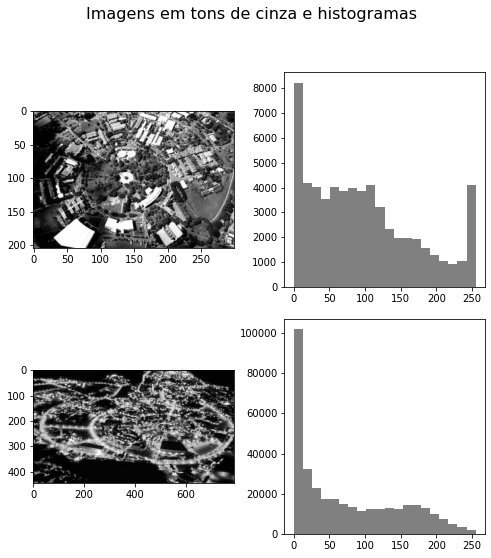

In [5]:
# Seu código aqui
from PIL import Image
list_files = os.listdir("gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/1")

fig, ax = plt.subplots(len(list_files), len(list_files))
fig.set_size_inches(7, 7)
fig.tight_layout(w_pad=2)
fig.suptitle('Imagens em tons de cinza e histogramas', fontsize=16, y=1.10)

for i, file in enumerate(list_files):

  img = Image.open(path + file).convert("L")
  f = np.asarray(img)
  ax[i, 0].imshow(f, cmap = 'gray')

  nbins = 20
  h, bin_edges = np.histogram(f, nbins,(0,255))
  plota_hist(h, 'gray', nbins, bin_edges, ax[i, 1])

#### Análise das imagens

Para a conversão para tons de cinza, utilizamos a função de biblioteca PIL.convert(). De acordo com a documentação, esta conversão é realizada através de uma transformada luma:

*When translating a color image to greyscale (mode “L”), the library uses the ITU-R 601-2 luma transform:*

*L = R * 299/1000 + G * 587/1000 + B * 114/1000*

A conversão utilizando a função de biblioteca coloca um peso maior ao conteúdo do canal verde, conforme podemos verificar acima. Esta decisão, da especificação ITU-T, me parece estar relacionada à questões históricas, uma vez que a especificação foi criada para transmissão de TV digital.

Nota-se que após a conversão para tons de cinza, os histogramas se tornam mais distintos, com o histograma da foto durante o dia mostrando uma densidade de tons de cinza mais intensa na faixa de 0 até 150, quando comparado ao histograma da foto durante à noite. Isso é exatamente o que seria esperado, dado que a foto à noite mostra menor luminosidade.


## Parte 2 - Extraindo atributos derivados do histograma

Histogramas podem ser utilizados para extrair atributos de imagens. Estes dados são úteis em tarefas de aprendizado de máquina, como a classificação de imagens. 

Dentre os atribitos mais comuns usados para a classificação de imagens, estão: *média*, *variância*, *assimetria* e *curtose*.

A função abaixo calcula, dada uma imagem, o histograma e seus atributos. Além dos atributos listados acima, ela também calcula os percentis 1, 10, 50, 90, 99 e 100%.



In [6]:
def histstat(f):
    import numpy as np

    h, bin_edges = np.histogram(f, 256, (0,255))
    hn = 1.0*h/h.sum() # compute the normalized image histogram
    cum_hn = np.cumsum(hn) # compute the cumulative image histogram
    v = np.zeros(9) # number of statistics

    # compute statistics
    n = len(h) # number of gray values
    v[0]  = np.sum((np.arange(n)*hn)) # mean
    v[1]  = np.sum(np.power((np.arange(n)-v[0]),2)*hn) # variance
    v[2]  = np.sum(np.power((np.arange(n)-v[0]),3)*hn)/(np.power(v[1],1.5))# skewness
    v[3]  = np.sum(np.power((np.arange(n)-v[0]),4)*hn)/(np.power(v[1],2))-3# kurtosis
    v[4] = np.where(cum_hn >= 0.01)[0][0] # 1% percentile
    v[5] = np.where(cum_hn >= 0.1)[0][0] # 10% percentile
    v[6] = np.where(cum_hn >= 0.5)[0][0] # 50% percentile
    v[7] = np.where(cum_hn >= 0.9)[0][0] # 90% percentile
    v[8] = np.where(cum_hn >= 0.99)[0][0] # 99% percentile

    return v

Se quisermos então extrair os atributos do histograma de uma das imagens anteriores, basta fazermos:

In [7]:
f = mpimg.imread(path+"unicamp_noite.jpg")
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2])
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')


74.39
5046.65
0.65
-0.90
0.00
3.00
51.00
184.00
236.00


### Exercício 2.2.1

Extraia agora os atributos da segunda imagem de exemplo e compare com os da primeira imagem. Eles parecem suficientemente diferentes para distinguir uma da outra?

In [8]:
# Seu código aqui
f = mpimg.imread(path+"unicamp_dia.jpg")
f_gray = np.uint8(0.3*f[:,:,0]+0.59*f[:,:,1]+0.11*f[:,:,2])
hist_features = histstat(f_gray)
for feature in hist_features:
  print(f'{feature:.2f}')


96.58
5459.88
0.61
-0.60
0.00
7.00
85.00
215.00
254.00


#### Análise 

Os valores dos atributos obtidos das imagens coloridas mostram uma diferença pequena, ressaltando a média e variância como principais. Os demais atributos não me pareceram serem suficientes para discernir as duas imagens. 

## Parte 3 - Classificação de imagens utilizando atributos derivados do histograma

### Exemplo - O classificador dos K-vizinhos mais próximos (KNN ou K-Nearest Neighbors) 

[KNN (K-Nearest Neighbors)](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) é um algoritmo de classificação que usa uma abordagem baseada em instâncias, ou seja, ele classifica uma nova amostra com base nas amostras mais próximas (vizinhas) a ela. O KNN se baseia na suposição de que amostras próximas no espaço de atributos estão mais propensas a pertencer à mesma classe.

Para classificar imagens usando o algoritmo KNN, primeiro o conjunto de dados de treinamento é utilizado para construir uma representação dos dados que permita a busca dos vizinhos mais próximos.

Em seguida, para classificar uma nova amostra, o algoritmo encontra as K amostras mais próximas na representação construída, em que K é um parâmetro definido pelo usuário.

Por fim, a classe da nova amostra é determinada pela classe mais comum entre os vizinhos encontrados.



###Exemplo de uso do KNN: 

Um conjunto de dados de duas classes é gerado aleatoriamente e, em seguida, o modelo KNN é treinado com k=5 vizinhos próximos. Note que a função **KNeighborsClassifier()** foi importada da biblioteca **sklearn.neighbors** e foi utilizada para criar o modelo KNN. A função *fit()* foi utilizada para treinar o modelo

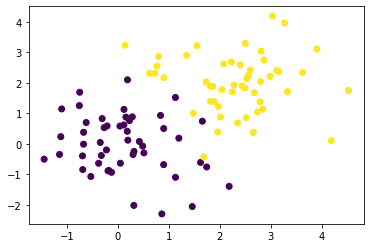

KNeighborsClassifier()

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Geração de dados aleatórios
np.random.seed(1)
X1 = np.random.randn(50, 2)  # 50 amostras da classe 1
X2 = np.random.randn(50, 2) + 2  # 50 amostras da classe 2
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(50), np.ones(50))) # rótulos das classes (0 e 1)

# Visualizando as amostras (coloridas por classe)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Criando o modelo KNN
model = KNeighborsClassifier(n_neighbors=5)

# Treinando o modelo
model.fit(X, y)


Em seguida, novas amostras aleatórias foram criadas para teste e o modelo foi utilizado para classificá-las. 

A função *predict()* é utilizada para classificar as novas amostras.



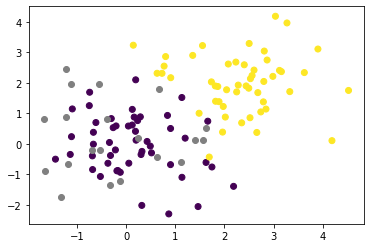

In [10]:
# Criando novas amostras aleatórias para teste
X_test = np.random.randn(20, 2)

#  Visualizando o conjunto de teste
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(X_test[:,0],X_test[:,1],c='gray')
plt.show()

# Classificando as amostras
y_pred = model.predict(X_test)



Para avaliar a qualidade de um classificador, normalmente se utiliza as seguintes métricas:

- [Acurácia (accuracy_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): mede a proporção de amostras classificadas corretamente pelo modelo.
- [Precisão (precision_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): mede a proporção de amostras classificadas como positivas (1) que são realmente positivas.
- [Recall (recall_score)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): mede a proporção de amostras positivas (1) que são corretamente identificadas pelo modelo.
- [F1-Score]() (f1_score): média harmônica entre precisão e recall.

Atenção: para avaliar o modelo, as métricas foram calculadas em relação às amostras de treinamento, o que **não** é o ideal em um cenário real de classificação. No entanto, para fins didáticos, pode-se utilizar essas métricas para avaliar o desempenho do modelo.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Avaliando o modelo
acc = accuracy_score(y, model.predict(X))
prec = precision_score(y, model.predict(X))
rec = recall_score(y, model.predict(X))
f1 = f1_score(y, model.predict(X))

# Imprimindo as métricas
print('Acurácia: %.2f' % acc)
print('Precisão: %.2f' % prec)
print('Recall: %.2f' % rec)
print('F1-Score: %.2f' % f1)

Acurácia: 0.96
Precisão: 0.94
Recall: 0.98
F1-Score: 0.96


Para fazer uma avaliação qualitativa do classificador, podemos plotar os resultados da classificação utilizando a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib. As amostras de treinamento são plotadas com pontos circulares, enquanto as amostras de teste são plotadas com pontos cruzados.


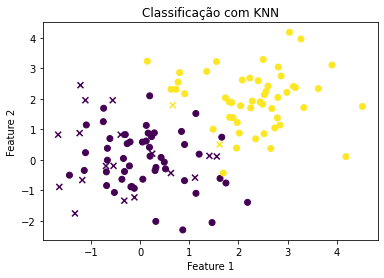

In [12]:

# Plotando os resultados
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_pred)
plt.title('Classificação com KNN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Exercício 2.3.1

Vamos agora usar o mesmo classificador KNN para classificar imagens. Nesse caso, ao invés de utilizar dados aleatórios para treinamento e teste, vamos extrair os atributos dos histogramas gerados pelos conjuntos de imagens utilizados para treino e teste. Os atributos serão utilizadas como dados de entrada do modelo. As imagens devem ser classificadas em "dia" e "noite".

O código abaixo cria os conjuntos de treino e teste (imagens e labels) utilizando as imagens disponíveis na pasta abaixo. Para cada classe (dia e noite), dividimos 5 imagens para treino (images_train e labels_train) e 4 imagens para teste (images_test e labels_test).

Observem que:
- Para criação das labels, utilizamos o método [split()](https://python-reference.readthedocs.io/en/latest/docs/str/split.html) no nome da imagem, utilizado como separador "_".
- Verificamos o nome da classe e atribuimos um valor inteiro para diferenciar cada uma.

In [13]:
files = "gdrive/MyDrive/P_IA901A_2023S1/IA901A_Ex02/2/"

list_files = os.listdir(files)
all_images = []
all_labels = []
for file in list_files:
  print(file)
  img = mpimg.imread(files+file)
  all_images.append(img)
  if file.split("_")[0]=="day": all_labels.append(0)
  else: all_labels.append(1)

images_train = all_images[0:3]+all_images[11:]
labels_train = all_labels[0:3]+all_labels[11:]
images_test = all_images[3:11]
labels_test = all_labels[3:11]  

#print(f'images_train: \n{images_train}')
print(f'labels_train: \n{labels_train}')
#print(f'images_test: \n{images_test}')
print(f'labels_test: \n{labels_test}')

day_1.jpeg
day_2.jpeg
day_3.jpeg
day_4.jpeg
day_5.jpeg
day_6.jpg
day_7.jpeg
night_1.jpg
night_2.jpg
night_3.jpg
night_4.jpg
night_5.gif
night_6.jpg
night_7.jpg
day_8.jpg
day_9.jpg
night_8.jpg
night_9.jpg
labels_train: 
[0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
labels_test: 
[0, 0, 0, 0, 1, 1, 1, 1]


**a)** Crie uma função que receba um conjunto de imagens RGB, transforme as imagens em *grayscale*, e extraia os atributos do histograma de cada imagem. A função deve retornar os atributos dos histogramas concatenados em um vetor de atributos. Utilize a função dada na Parte 1 desse notebook para extração de atributos.

Utilize os conjuntos de dados do item anterior para obter os vetores de atributos para os conjunto de treino e teste (train_features e test_features). 

**Atenção!** Para o conjunto de treino você deve obter uma matriz 10 x 9, onde cada linha corresponde a uma amostra (imagem) e cada coluna correponde a um atributo do histograma. Da mesma forma, para o conjunto de teste você deve obter uma matriz 8 x 9. 

In [14]:
from re import I
# Seu código aqui
def getImageFeatures(imgList):

  attrV = []

  for i in imgList:
    img = Image.fromarray(i)
    imgGS = img.convert("L")
    f = np.asarray(imgGS)
    attrV.append(histstat(f))

  return attrV

# Conjuntos de treinamento e teste
train_features = getImageFeatures(images_train)
test_features = getImageFeatures(images_test)

#### Comentários

Novamente aqui foi utilizada a função de conversão da biblioteca PIL para gerarmos as imagens em tons de cinza e logo após através da função getImageFeatures() geramos os atributos para as listas de imagens das bases de treinamento e teste.

**b)** Treine um modelo kNN utilizando o conjunto de dados de treino criado (train_features). Você precisará escolher um valor de k. Valide o modelo utilizando o conjunto de dados de teste (test_features). Calcule as métricas de avaliação do classificador para ambos os conjuntos de dados (primeiro para treino, depois para teste): acurácia, precisão, revocação e F1-score. Imprima a [Matriz de Confusão](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)


Para o processo de treinamento definimos três funções abaixo:

**print_metrics()** - função responsável por imprimir as métricas usuais de perfomance do modelo assim como opcionalmente a matriz de confusão.

**train_knn()** - função responsável por treinar um modelo KNN tomando como parâmetro de entrada o número de vizinhos K e a base de treinamento.

**classify()** - função responsável por realizar a inferência do modelo nas bases de treinamento ou teste e imprimir as métricas utilizando a função print_metrics().

In [15]:
# Definição de uma função para a impressão de métricas.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

def print_metrics(model, label, pred, print_matrix):
  # Avaliando o modelo
  acc = accuracy_score(label, pred)
  prec = precision_score(label, pred)
  rec = recall_score(label, pred)
  f1 = f1_score(label, pred)

  # Imprimindo as métricas
  print('Acurácia: %.2f' % acc)
  print('Precisão: %.2f' % prec)
  print('Recall: %.2f' % rec)
  print('F1-Score: %.2f' % f1)

  if (print_matrix):
    # Matriz de confusão
    print("\n\nMatriz de Confusão:")
    cm = confusion_matrix(label, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
    disp.plot()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(neighbors, features, labels):

  # Criando o modelo KNN
  model = KNeighborsClassifier(n_neighbors=neighbors)

  # Treinando o modelo
  model.fit(features, labels)

  return model

mdl = train_knn(3, train_features, labels_train)

Teste com base de treinamento:

Acurácia: 0.90
Precisão: 0.83
Recall: 1.00
F1-Score: 0.91


Matriz de Confusão:


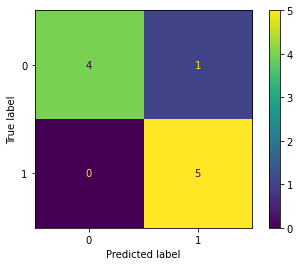

In [17]:
def classify(model, features, labels, print_matrix):
  # Teste com dados de treinamento
  pred = model.predict(features)

  # Métricas
  print_metrics(model, labels, pred, print_matrix)

  return pred

print("Teste com base de treinamento:\n")
train_pred = classify(mdl, train_features, labels_train, True)

Teste com base de testes:

Acurácia: 0.88
Precisão: 1.00
Recall: 0.75
F1-Score: 0.86


Matriz de Confusão:


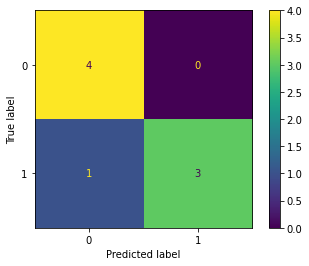

In [18]:
print("Teste com base de testes:\n")
test_pred = classify(mdl, test_features, labels_test, True)

#### Análise

Notamos que o resultado do classificador com K = 3 foi a melhor obtida tomando como base as métricas de resultado, com acurácia acima de 88% e alta precisão.

**c)** Tente plotar os resultados da classificação usando os atributos 2 a 2 como eixos. Utilize a função [scatter()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) do matplotlib, já demonstrada no início da Parte 3 deste notebook. As amostras de treinamento devem ser plotadas com pontos circulares, enquanto as amostras de teste devem ser plotadas com pontos cruzados. Comente os resultados obtidos.


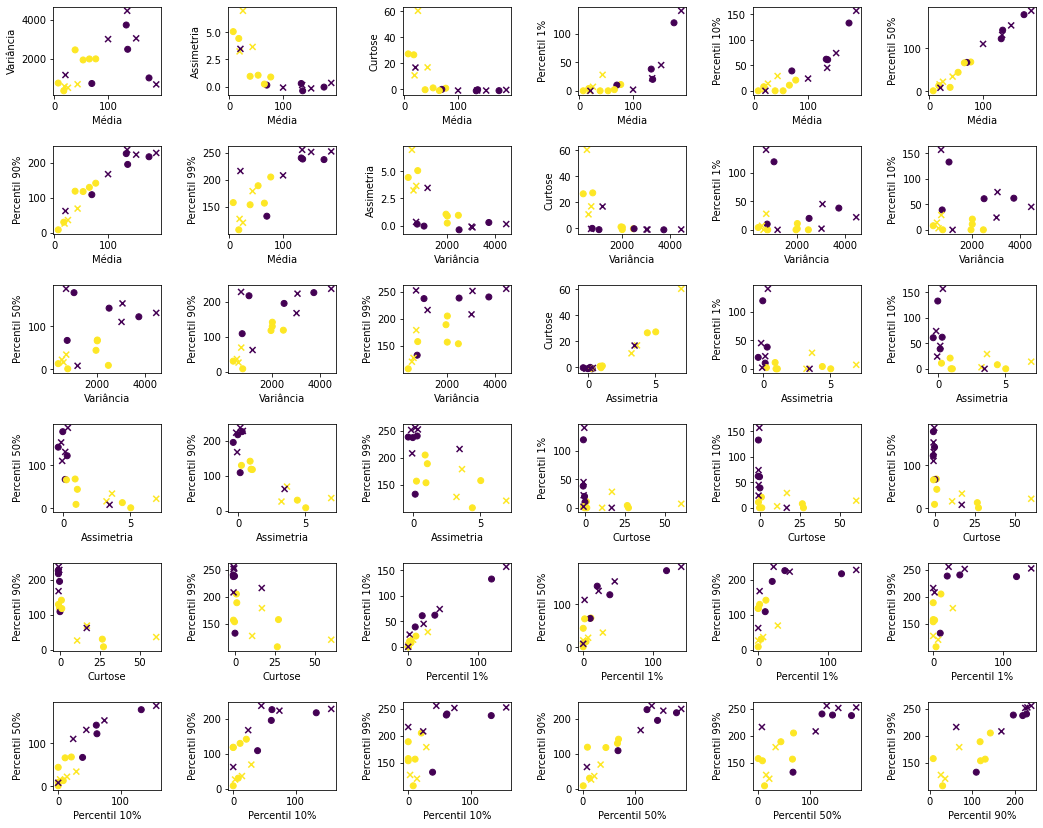

In [19]:
# Seu código aqui

import itertools

def plot(tr0, tr1, tst0, tst1, xlbl, ylbl, ax):

  ax.scatter(tr0, tr1, marker='o', c=train_pred)
  ax.scatter(tst0, tst1, marker='x', c=test_pred)
  ax.set_xlabel(xlbl)
  ax.set_ylabel(ylbl)

# Extração de cada uma dos features da matriz
train0 = [feat[0] for feat in train_features]
train1 = [feat[1] for feat in train_features]
train2 = [feat[2] for feat in train_features]
train3=  [feat[3] for feat in train_features]
train4 = [feat[4] for feat in train_features]
train5 = [feat[5] for feat in train_features]
train6 = [feat[6] for feat in train_features]
train7 = [feat[7] for feat in train_features]
train8 = [feat[8] for feat in train_features]

test0 = [feat[0] for feat in test_features]
test1 = [feat[1] for feat in test_features]
test2 = [feat[2] for feat in test_features]
test3=  [feat[3] for feat in test_features]
test4 = [feat[4] for feat in test_features]
test5 = [feat[5] for feat in test_features]
test6 = [feat[6] for feat in test_features]
test7 = [feat[7] for feat in test_features]
test8 = [feat[8] for feat in test_features]

train_feats = [train0, train1, train2, train3, train4, train5, train6, train7, train8]
test_feats = [test0, test1, test2, test3, test4, test5, test6, test7, test8]
axis_str = ['Média', 'Variância', 'Assimetria','Curtose', 'Percentil 1%', 'Percentil 10%', 
            'Percentil 50%', 'Percentil 90%', 'Percentil 99%']

# Gráfico
fig, ax = plt.subplots(6, 6, figsize=(15, 12))
fig.tight_layout(pad=3.0)

ax_lst = []
for i in range(0, 6):
  for j in range(0, 6):
    ax_lst.append(ax[i, j])

ax_cnt = 0

for comb in itertools.combinations([0, 1, 2, 3, 4, 5, 6, 7, 8], 2):
    plot(train_feats[comb[0]], train_feats[comb[1]],
         test_feats[comb[0]], test_feats[comb[1]],
         axis_str[comb[0]],
         axis_str[comb[1]],
         ax_lst[ax_cnt]
         )
    ax_cnt = ax_cnt + 1

plt.show()


#### Análise dos gráficos

Analisando os gráficos obtidos, notamos que em algumas das combinações dos atributos, a separação das amostras é mais clara delimitando fronteiras mais suaves. Em especial, a combinação Percentil 50% e Percentil 99% me pareceu, na inspeção visual, a melhor combinação de atributos para determinar uma fronteira bem definida.

Comente os resultados obtidos: você está satisfeito com o resultado? o que você pode inferir do seu classificador ao observar as métricas obtidas? qual o erro mais frequente?

#### Análise do classificador

De um modo geral, o desempenho do classificador é razoavelmente alto (acurácia acima de 85%, precisão e recall também altos) ao se utilizar 3 vizinhos como parâmetro do modelo KNN.
Notei que para valores acima de 3 o modelo tende a ter um desempenho mais baixo.
Os erros obtidos foram apenas um caso do falso positivo (na base de treinamento) e um caso de falso negativo (na base de testes).

### Exercício 2.3.2

Tente melhorar os resultados de classificação, alterando os atributos extraídos. Algumas sugestões:

- redimensione as imagens para um tamanho menor **(64, 64)**, isso pode deixar os atributos menos suceptíveis a ruídos e detalhes, focando a classificação em características mais gerais;
- em problemas de classificação onde temos poucas amostras e muitos atributos, temos o "mal da dimensionalidade". Para fugir desse problema, faça uma seleção de atributos, ou seja, não utilize todos os atributos extraídos. Voê pode escolher os atributos aleatoriamente, pode fazer uma análise estatística dos atributos correlacionados, pode fazer uma análise visual. Pode também usar técnicas específicas de seleção de atributos ([feature selection](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection)).
- altere o valor de vizinhos k;

### Redimensionamento de Imagens

 Nossa primeira etapa será efetuar o redimensionamento das imagens, treinar o modelo e obter as métricas.

Imagens de Treinamento:


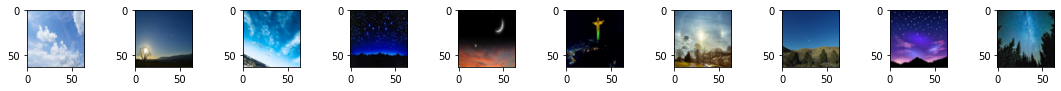

In [20]:
# Seu código aqui
# Redimensionamento das imagens

images_train_rez = []
images_test_rez = []

def resize_imgs(imgList):
  resized_list = []
  for i in imgList:
    img = Image.fromarray(i)
    imgResized = img.resize((64, 64))
    imgArray = np.asarray(imgResized)
    resized_list.append(imgArray)
  return resized_list

def print_images(imgList):
  fig, ax = plt.subplots(1, len(imgList), figsize=(15, 12))
  fig.tight_layout(w_pad=2)
  for i, img in enumerate(imgList):
    ax[i].imshow(img)

images_train_rez = resize_imgs(images_train)
images_test_rez = resize_imgs(images_test)

print("Imagens de Treinamento:")
print_images(images_train_rez)

Imagens de Teste:


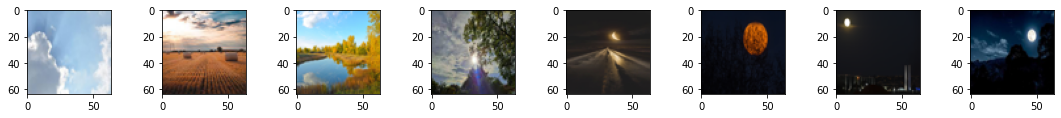

In [21]:
print("Imagens de Teste:")
print_images(images_test_rez)

In [22]:
# Obtenção dos atributos das imagens
# Conjuntos de treinamento e teste
train_features_rez = getImageFeatures(images_train_rez)
test_features_rez = getImageFeatures(images_test_rez)

# Treinamento do modelo
mdl = train_knn(3, train_features_rez, labels_train)

Teste com base de treinamento:

Acurácia: 0.70
Precisão: 0.67
Recall: 0.80
F1-Score: 0.73


Matriz de Confusão:


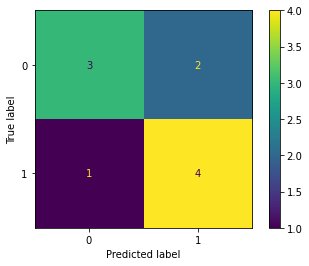

In [23]:
print("Teste com base de treinamento:\n")
train_pred = classify(mdl, train_features_rez, labels_train, True)

Teste com base de testes:

Acurácia: 0.88
Precisão: 1.00
Recall: 0.75
F1-Score: 0.86


Matriz de Confusão:


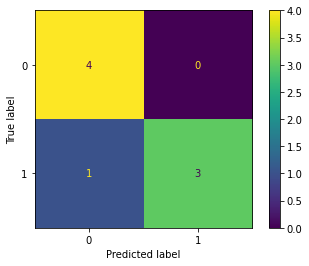

In [24]:
print("Teste com base de testes:\n")
train_pred = classify(mdl, test_features_rez, labels_test, True)

#### Análise

Não tivemos nenhuma melhoria do desempenho do modelo na base de testes ao executar o redimensionamento das imagens. 
Isso se deve ao fato que o desempenho inicial do modelo já foi muito alto, com apenas uma classificação errada.
Adicionalmente, notamos que o desempenho do modelo na base de treinamento caiu de forma significativa.

### Seleção de features

Para seleção de features, utilizaremos um dos selecionadores providos pela biblioteca Scikit-Learn. Em especial, o **SelectPercentile** seleciona os features de acordo com uma percentagem dos scores mais altos. Colocamos como parâmetro a seleção de 50% das features.

Antes de executar a seleção, executamos o escalonamento das features na escala de 0 a 1 para melhorar o desempenho dos algoritmos internos de otimização da biblioteca.




In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile, chi2

# Necessário inicialmente escalonar as features para poder usar os métodos
# de seleção de features.
minmax_scaler = MinMaxScaler()
scaled_train = minmax_scaler.fit_transform(train_features_rez)
scaled_test = minmax_scaler.fit_transform(test_features_rez)

selector = SelectPercentile(chi2, percentile=50)
new_train_features = selector.fit_transform(scaled_train, labels_train)
support = selector.get_support()

# Remoção da mesmas features na matriz de features de teste:
del_spec = []
i = 0
for s in support:
  if (s == False):
    del_spec.append(i)
  i = i + 1

new_test_features = np.delete(scaled_test, del_spec, axis=1)

Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


Matriz de Confusão:



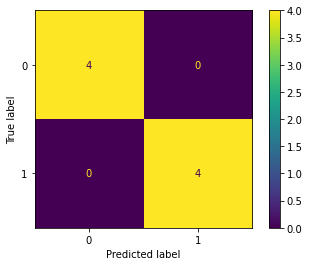

In [26]:
mdl = train_knn(3, new_train_features, labels_train)

pred = classify(mdl, new_test_features, labels_test, True)
print()

### Análise

O resultado com a base de testes foi uma classificação perfeita (todos os parâmetros de métricas maximizados). Isso se deve ao tamanho da amostra de testes, imagino que com uma base maior esse desempenho não irá se repetir.

### Otimização do parâmetro K

Para otimizar o parâmetro K, número de vizinhos, criamos modelos parametrizando este valor e testamos o desempenho dos mesmos na base de testes.

In [27]:
kValues = [1, 3, 5, 7, 9]

for k in kValues:
  mdl = train_knn(k, train_features_rez, labels_train)

  print("Teste com base de testes k =", k)
  pred = classify(mdl, test_features_rez, labels_test, False)
  print()

Teste com base de testes k = 1
Acurácia: 0.62
Precisão: 0.67
Recall: 0.50
F1-Score: 0.57

Teste com base de testes k = 3
Acurácia: 0.88
Precisão: 1.00
Recall: 0.75
F1-Score: 0.86

Teste com base de testes k = 5
Acurácia: 0.75
Precisão: 0.67
Recall: 1.00
F1-Score: 0.80

Teste com base de testes k = 7
Acurácia: 0.88
Precisão: 0.80
Recall: 1.00
F1-Score: 0.89

Teste com base de testes k = 9
Acurácia: 0.88
Precisão: 0.80
Recall: 1.00
F1-Score: 0.89



#### Análise 

Notamos que o melhor desempenho do modelo é obtido com o valor de **K = 3**. Este foi o mesmo valor que selecionamos de forma empírica no início do exercício.

### Conclusões finais

Ressaltamos algumas conclusões a respeito do exercício de classificação:

* O desempenho de um modelo simples, como KNN, foi razoavelmente alto mesmo sem efetuarmos escalonamento dos atributos de entrada.
* Não obtivemos melhorias no desempenho da classificação com o aumento do número de vizinhos no modelo acima de **K=3**.
* O redimensionamento das imagens não trouxe ganhos no desempenho do modelo.
* A quantidade de atributos extraídos das imagens inicialmente reduziu o desempenho do modelo, de forma que ao reduzirmos a quantidade dos mesmos obtivemos ganhos.

Este exercício foi muito interessante para exercitar a classificação de imagens utilizando um modelo de aprendizado de máquina de aprendizado de máquina tradicional, sem utilizar da complexidade de algoritmos de aprendizado profundo.

